## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Please install GPU version of TF


In [3]:
tf.test.gpu_device_name()

''

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [7]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [8]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [11]:
 # view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1164 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 76 images belonging to 2 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\yoges\anaconda3\envs\tensorflow2\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
37/37 [==============================] - 87s 2s/step - loss: 0.5608 - accuracy: 0.7663 - val_loss: 0.4826 - val_accuracy: 0.7895
Epoch 2/50
37/37 [==============================] - 85s 2s/step - loss: 0.2479 - accuracy: 0.8892 - val_loss: 0.2690 - val_accuracy: 0.9079
Epoch 3/50
37/37 [==============================] - 84s 2s/step - loss: 0.1782 - accuracy: 0.9270 - val_loss: 0.2580 - val_accuracy: 0.8947
Epoch 4/50
37/37 [==============================] - 91s 2s/step - loss: 0.1462 - accuracy: 0.9485 - val_loss: 0.2404 - val_accuracy: 0.9079
Epoch 5/50
37/37 [==============================] - 85s 2s/step - loss: 0.1486 - accuracy: 0.9399 - val_loss: 0.2943 - val_accuracy: 0.9079
Epoch 6/50
37/37 [==============================] - 90s 2s/step - loss: 0.1201 - accuracy: 0.9588 - val_loss: 0.2718 - val_accuracy: 0.9079
Epoch 7/50
37/37 [==============================] - 86s 2s/step - loss: 0.0842 - accuracy: 0.9708 - val_loss: 0.3761 - val_accuracy: 0.8816
Epoch 8/50
37/37 [==

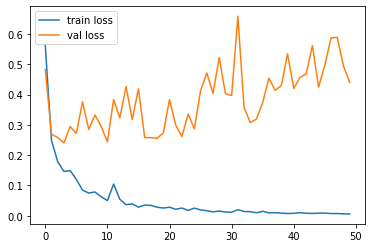

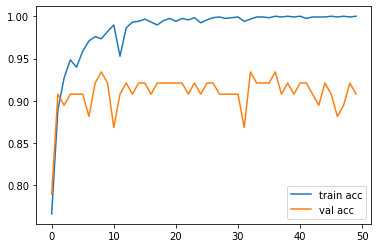

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [19]:

y_pred = model.predict(test_set)


In [20]:
y_pred

array([[5.89027477e-05, 9.99941111e-01],
       [7.54347411e-07, 9.99999285e-01],
       [9.99999881e-01, 6.24906278e-08],
       [1.46681152e-04, 9.99853253e-01],
       [9.99762714e-01, 2.37287299e-04],
       [9.64790702e-01, 3.52093317e-02],
       [5.11061907e-01, 4.88938123e-01],
       [1.00000000e+00, 1.42849093e-08],
       [2.74053991e-01, 7.25946009e-01],
       [2.79917028e-02, 9.72008348e-01],
       [4.09395229e-09, 1.00000000e+00],
       [2.23681991e-06, 9.99997735e-01],
       [9.98632014e-01, 1.36795151e-03],
       [3.13966053e-09, 1.00000000e+00],
       [9.58281336e-04, 9.99041736e-01],
       [4.50680405e-01, 5.49319625e-01],
       [9.81640160e-01, 1.83598567e-02],
       [1.85714306e-08, 1.00000000e+00],
       [9.98235583e-01, 1.76435802e-03],
       [7.72786915e-01, 2.27213055e-01],
       [9.94584501e-01, 5.41550992e-03],
       [2.75633482e-07, 9.99999762e-01],
       [3.21416088e-11, 1.00000000e+00],
       [2.25941471e-06, 9.99997735e-01],
       [8.060348

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_vgg16.h5')

In [25]:
img_data

NameError: name 'img_data' is not defined

In [ ]:
img=image.load_img('Datasets/test/cats/cat.4259.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

In [ ]:
if a==0:
    print("The image classified is cat")
else:
    
    print("The image classified is dog")